In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data= pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
x= data[['Annual Income (k$)','Spending Score (1-100)']].values

In [9]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
from sklearn.cluster import KMeans

In [16]:
wcss=[]
for i in range(1,11):
    ikmeans=KMeans(n_clusters=i)
    ikmeans.fit(x)
    wcss.append(ikmeans.inertia_)

Text(0.5,1,'cluster estimation')

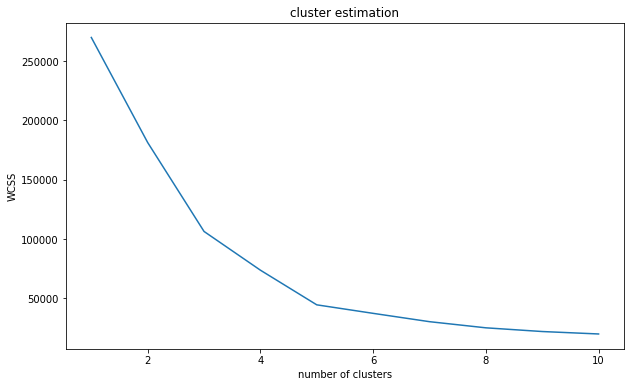

In [23]:
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.plot(range(1,11),wcss)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('WCSS')
ax1.set_title('cluster estimation')

In [24]:
'''elbow method suggest 5 clusters is optimal'''

'elbow method suggest 5 clusters is optimal'

In [25]:
kmeans= KMeans(n_clusters=5)

In [26]:
kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
cluster=kmeans.labels_
type(cluster)

numpy.ndarray

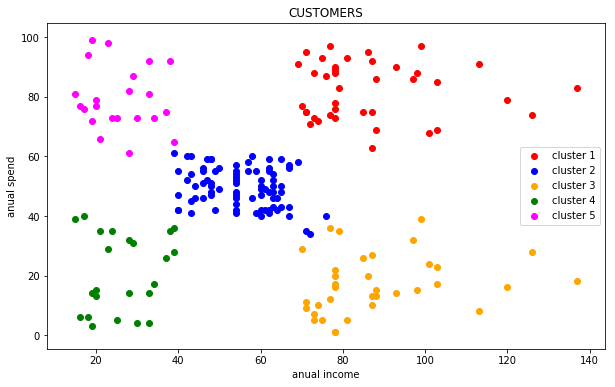

In [34]:
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.scatter(x[cluster==0,0],x[cluster==0,1], c='red',label='cluster 1')
ax1.scatter(x[cluster==1,0],x[cluster==1,1], c='blue',label='cluster 2')
ax1.scatter(x[cluster==2,0],x[cluster==2,1], c='orange',label='cluster 3')
ax1.scatter(x[cluster==3,0],x[cluster==3,1], c='green',label='cluster 4')
ax1.scatter(x[cluster==4,0],x[cluster==4,1], c='magenta',label='cluster 5')
ax1.set_xlabel('anual income')
ax1.set_ylabel('anual spend')
ax1.set_title('CUSTOMERS')
ax1.legend()